[[ 0.78051   -0.063669 ]
 [ 0.28774    0.29139  ]
 [ 0.40714    0.17878  ]
 [ 0.2923     0.4217   ]
 [ 0.50922    0.35256  ]
 [ 0.27785    0.10802  ]
 [ 0.27527    0.33223  ]
 [ 0.43999    0.31245  ]
 [ 0.33557    0.42984  ]
 [ 0.23448    0.24986  ]
 [ 0.0084492  0.13658  ]
 [ 0.12419    0.33595  ]
 [ 0.25644    0.42624  ]
 [ 0.4591     0.40426  ]
 [ 0.44547    0.45117  ]
 [ 0.42218    0.20118  ]
 [ 0.49563    0.21445  ]
 [ 0.30848    0.24306  ]
 [ 0.39707    0.44438  ]
 [ 0.32945    0.39217  ]
 [ 0.40739    0.40271  ]
 [ 0.3106     0.50702  ]
 [ 0.49638    0.45384  ]
 [ 0.10073    0.32053  ]
 [ 0.69907    0.37307  ]
 [ 0.29767    0.69648  ]
 [ 0.15099    0.57341  ]
 [ 0.16427    0.27759  ]
 [ 0.33259    0.055964 ]
 [ 0.53741    0.28637  ]
 [ 0.19503    0.36879  ]
 [ 0.40278    0.035148 ]
 [ 0.21296    0.55169  ]
 [ 0.48447    0.56991  ]
 [ 0.25476    0.34596  ]
 [ 0.21726    0.28641  ]
 [ 0.67078    0.46538  ]
 [ 0.3815     0.4622   ]
 [ 0.53838    0.32774  ]
 [ 0.4849     0.26071  ]


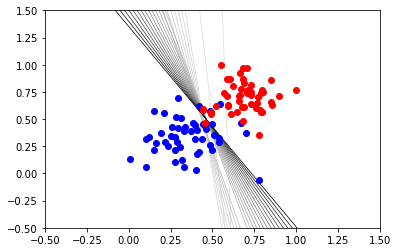

In [4]:
# https://ryanwingate.com/intro-to-machine-learning/deep/perceptron-implementations/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# if the plotted point is described by a value greater than or equal to 0 (positive)
# then the plotted point is misclassified above the model line.
def convert_location_to_standardized_representation(lines):
    if lines >= 0:
        return 1
    else:
        return 0

def prediction(x_plots, coeffecients, y_intercept):
    lines = (np.matmul(x_plots, coeffecients) + y_intercept)[0]
    return convert_location_to_standardized_representation(lines)

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def make_perceptron_step(plots, y_plots, W, b, learn_rate = 0.01):
    for i in range(len(plots)):
        y_hat = prediction(plots[i], W, b)

        if y_plots[i] - y_hat == 1:
            W[0] += plots[i][0] * learn_rate
            W[1] += plots[i][1] * learn_rate
            b += learn_rate
        elif y_plots[i] - y_hat == -1:
            W[0] -= plots[i][0] * learn_rate
            W[1] -= plots[i][1] * learn_rate
            b -= learn_rate
    return W, b

            
def execute_perceptron_algorithm(plots, y_intercepts, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(plots.T[0]), max(plots.T[0])
    y_min, y_max = min(plots.T[1]), max(plots.T[1])
    
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    boundary_lines = []
    
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = make_perceptron_step(plots, y_intercepts, W, b, learn_rate)
        boundary_lines.append((-W[0]/ W[1], -b/W[1]))
        
    return boundary_lines

##################

data = np.loadtxt('./perceptron_data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]

print(X)

lines = execute_perceptron_algorithm(X, y)

print('Epoch :\t\tW\t\tB')
for n, line in enumerate(lines):
    print('{}:\t\t{}\t\t{}'
          .format(str(n+1).zfill(2),
                  round(line[0][0],3), 
                  round(line[1][0],3)))

plt.figure()

X_min = X[:,:1].min()
X_max = X[:,:1].max()

counter = len(lines)
for w, b in lines:
    counter -= 1
    color = [1 - 0.91 ** counter for _ in range(3)]
    plt.plot([X_min-0.5, X_max+0.5],
             [(X_min-0.5) * w + b, (X_max+0.5) * w + b],
             color=color,
             linewidth=0.75)
    
plt.scatter(X[:50,:1], 
            X[:50,1:], 
            c = 'blue',
            zorder=3)
plt.scatter(X[50:,:1], 
            X[50:,1:], 
            c = 'red',
            zorder=3)

plt.gca().set_xlim([-0.5,1.5])
plt.gca().set_ylim([-0.5,1.5]);

